In [80]:
import os
import random
import openweathermapy.core as ow
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
api_key = "8b470b618b32d04717d95d67a3997c16"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [92]:
#Generate random numbers
Long = np.random.uniform(-180,180,550)
Lat =  np.random.uniform(-90,90,550)



In [93]:
#Make Coordinates to dataframs
Coordinates = {"Long": Long, "Lat": Lat}
Coordinates_df = pd.DataFrame(Coordinates)
Coordinates_df.head()

,Lat,Long
0,-71.066785,-136.044560
1,-82.933394,-131.253388
2,-62.923891,-34.202476
3,-81.129259,-172.496532
4,6.184056,22.904226


In [94]:
city_coordinates = Coordinates_df.as_matrix()

In [95]:
#loop through coordinates
cities = []

for coordinate_pair in city_coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
    


In [96]:
#Build Query url
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8b470b618b32d04717d95d67a3997c16&units=imperial&q='

In [97]:
weather_data = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
lat_list = []
long_list =[]
    
for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        #print(response)
        temp_data = response['main']['temp']
        humidity_data = response['main']["humidity"]
        clouds_data = response["clouds"]["all"]
        wind_data = response["wind"]["speed"]
        lat_data = response["coord"]["lat"]
        long_data = response["coord"]["lon"]
    except KeyError:
        print("Ooops, the city can not be found!")
    
    #weather_data.append(response)
    temp_list.append(temp_data)
    humidity_list.append(humidity_data)
    clouds_list.append(clouds_data)
    wind_list.append(wind_data)
    lat_list.append(lat_data)
    long_list.append(long_data)
    
print("Thats the end of the list")

Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the city can not be found!
Ooops, the cit

In [98]:
temp_data

92.24

In [99]:
humidity_data

56

In [100]:
weather_report = {"Temperature (F)": temp_list, "Humidity (%)": humidity_list, "Cloudiness (%)": clouds_list, "Wind Speed (MPH)": wind_list, "Latitude": lat_list,"Longitude": long_data, "Cities": cities}

weather_report_df = pd.DataFrame(weather_report)


weather_report_df.to_csv("weather_report.csv")

weather_report_df.head()

,Cities,Cloudiness (%),Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,rikitea,76,99,-23.12,138.6,80.13,17.47
1,rikitea,76,99,-23.12,138.6,80.13,17.47
2,mar del plata,0,55,-46.43,138.6,62.63,20.38
3,vaini,0,43,15.34,138.6,83.87,4.38
4,bria,0,58,6.54,138.6,64.34,12.77


In [101]:
file_name = os.path.join("weather_report.csv")
report_df = pd.read_csv(file_name)
report_df.head()

,Unnamed: 0,Cities,Cloudiness (%),Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,0,rikitea,76,99,-23.12,138.6,80.13,17.47
1,1,rikitea,76,99,-23.12,138.6,80.13,17.47
2,2,mar del plata,0,55,-46.43,138.6,62.63,20.38
3,3,vaini,0,43,15.34,138.6,83.87,4.38
4,4,bria,0,58,6.54,138.6,64.34,12.77


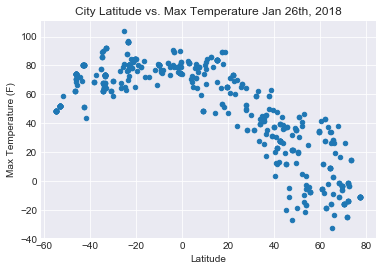

In [106]:
report_df.plot.scatter(x='Latitude', y="Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs. Max Temperature Jan 26th, 2018')
plt.style.use('seaborn-dark')
plt.grid(True)

plt.savefig("City_Lat vs Temperature")
plt.show()

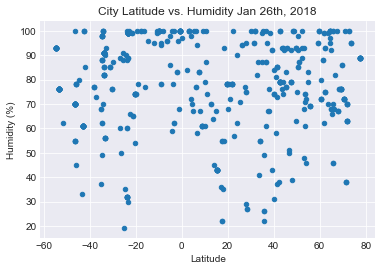

In [107]:
report_df.plot.scatter(x='Latitude', y="Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity Jan 26th, 2018')
plt.style.use('seaborn-dark')
plt.grid(True)

plt.savefig("City_Lat vs Humidity")
plt.show()

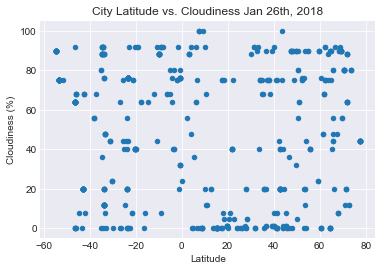

In [108]:
report_df.plot.scatter(x='Latitude', y="Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness Jan 26th, 2018')
plt.style.use('seaborn-dark')
plt.grid(True)

plt.savefig("City_Lat vs Cloudiness")
plt.show()

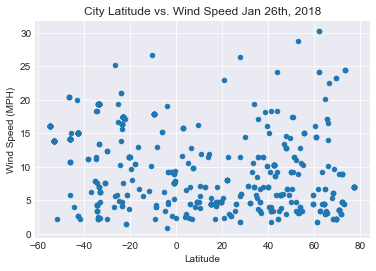

In [109]:
report_df.plot.scatter(x='Latitude', y="Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title('City Latitude vs. Wind Speed Jan 26th, 2018')
plt.style.use('seaborn-dark')
plt.grid(True)

plt.savefig("City_Lat vs Wind Speed")
plt.show()